[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/NU-MSE-LECTURES/465_Computational_Microscopy_2026/blob/dev/Week_01/assignments/assignment_01_setup.ipynb)

# Assignment 1: Environment Setup and Python Basics
**Due Date:** January 12, 2026

## Instructions
1.  Complete the tasks in the cells below.
2.  Ensure all code runs without errors.
3.  Submit your completed notebook via Canvas (or GitHub if instructed).

In [165]:
# Colab setup
try:
    import google.colab
    IN_COLAB = True
    print("Running in Google Colab. Installing requirements...")
    !pip install hyperspy ase py4DSTEM
    !git clone https://github.com/NU-MSE-LECTURES/465_Computational_Microscopy_2026.git
    print("Setup complete.")
except ImportError:
    IN_COLAB = False
    print("Not running in Google Colab.")

Not running in Google Colab.


## Task 1: Environment Verification

Write a Python script to:
1.  Import `sys`, `numpy`, and `matplotlib`.
2.  Print the Python version.
3.  Print the versions of `numpy` and `matplotlib`.

In [166]:
# Your code here
import sys
import numpy as np
import matplotlib
import platform
import scipy
import hyperspy
import py4DSTEM
import skimage

print(f"Python version: {sys.version}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Operating System: {platform.platform()}")
print(f"Scipy version: {scipy.__version__}")
print(f"Hyperspy version: {hyperspy.__version__}")
print(f"py4DSTEM version: {py4DSTEM.__version__}")


Python version: 3.10.19 | packaged by conda-forge | (main, Oct 22 2025, 22:46:49) [Clang 19.1.7 ]
NumPy version: 2.2.6
Matplotlib version: 3.10.8
Operating System: macOS-26.2-arm64-arm-64bit
Scipy version: 1.15.2
Hyperspy version: 2.2.0
py4DSTEM version: 0.14.14


In [167]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import hyperspy.api as hs
import py4DSTEM
import sklearn

## Task 2: Automate Project Structure

Write a Python script using `os` or `pathlib` to programmatically create the following directory structure inside a folder named `assignment_01_output`:
```
assignment_01_output/
├── data/
│   ├── raw/
│   └── processed/
├── figures/
└── src/
```

In [168]:
# Your code here
import os

base_dir = "assignment_01_output"
subdirs = [
    "data/raw",
    "data/processed",
    "figures",
    "src"
]

for subdir in subdirs:
    path = os.path.join(base_dir, subdir)
    os.makedirs(path, exist_ok=True)
    print(f"Created directory: {path}")

Created directory: assignment_01_output/data/raw
Created directory: assignment_01_output/data/processed
Created directory: assignment_01_output/figures
Created directory: assignment_01_output/src


## Task 3: Ensure Reproducibility

Demonstrate reproducibility by:
1.  Setting a random seed using `numpy.random.seed()`.
2.  Generating an array of 5 random numbers.
3.  Printing the array.
4.  Run the cell multiple times to verify that the numbers remain the same.

In [169]:
# Your code here
import numpy as np

# Set the seed
np.random.seed(42)

# Generate random numbers
random_numbers = np.random.rand(5)
print(f"Random numbers: {random_numbers}")

Random numbers: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]


<Signal2D, title: , dimensions: (|503, 503)>
shape: <Axes manager, axes: (|503, 503)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
---------------- | ------ | ------ | ------- | ------- | ------ 
           width |    503 |      0 |      -0 |       1 | <undefined> 
          height |    503 |      0 |      -0 |       1 | <undefined> 


The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.
The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.
The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.
The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.
The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.
The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.


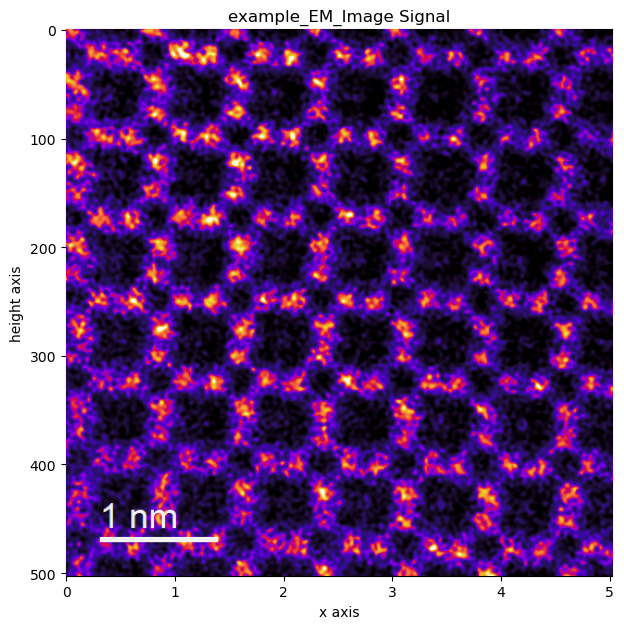

In [170]:
signal = hs.load('assignment_01_output/data/raw/example_EM_Image.tif')
print(signal)
print(f'shape: {signal.axes_manager}')
# s_4d = hs.load('assignment_01_output/data/raw/example_EM_Image.tif', lazy=True)
signal.axes_manager[0].scale = 0.01
signal.axes_manager[0].name = 'x'
signal.axes_manager[0].unitscale = 'nm'
signal.plot()
signal.plot(colorbar=True)


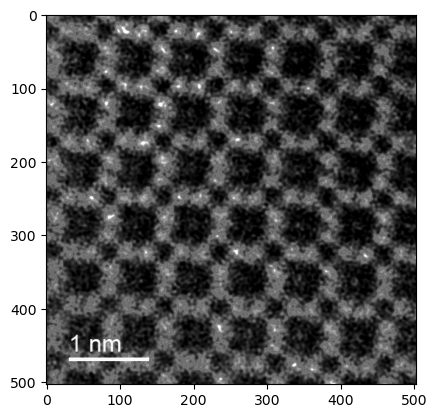

In [171]:
plt.imshow(gray_data, cmap='gray')
plt.imsave('assignment_01_output/figures/gray_data.png', gray_data, cmap='gray')


--- Image Statistics ---
Mean Intensity: 59.01
Standard Deviation: 42.33


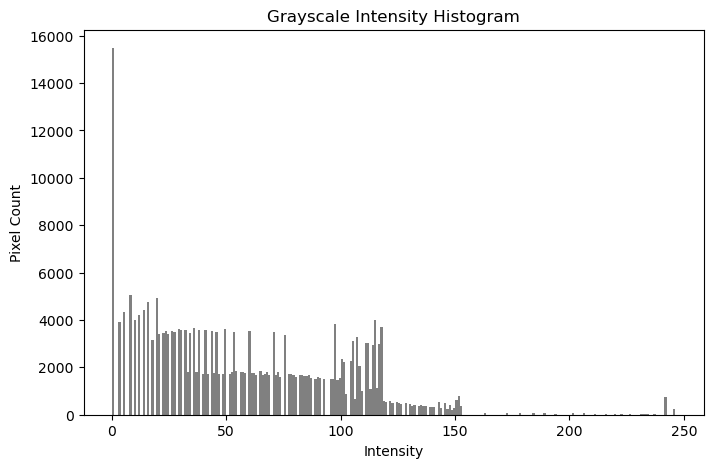

In [ ]:
# 1. Access the structured data
raw_data = signal.data

# 2. Convert to grayscale by averaging R, G, and B
# Use .astype(float) to prevent overflow during addition
gray_data = (raw_data['R'].astype(float) + 
             raw_data['G'].astype(float) + 
             raw_data['B'].astype(float)) / 3.0

# 3. Compute Statistics
print("--- Image Statistics ---")
print(f"Mean Intensity: {np.mean(gray_data):.2f}")
print(f"Standard Deviation: {np.std(gray_data):.2f}")

# 4. Plot Histogram
plt.figure(figsize=(8, 5))
plt.hist(gray_data.ravel(), bins=256, color='gray')
plt.title("Grayscale Intensity Histogram")
plt.xlabel("Intensity")
plt.ylabel("Pixel Count")
plt.show()

There is a very high spike at intensity 0. This indicates a significant portion of the image is completely black, possibly representing the background or masked areas outside the sample. 

Low-to-Mid Intensities (10–75): There is a broad, relatively flat plateau of pixels in this range. These represent the darker gray features of the sample.

Mid-Tone Peak (~115): There is a distinct cluster or peak around intensity 115. This suggests a specific feature or phase in the EM image has a consistent brightness at this level.

Beyond intensity 150, the pixel count drops significantly. The image has very few bright or "white" pixels, meaning it is relatively low-contrast or underexposed in the highlight regions.